# 0.0 IMPORTS

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import inflection
import math
from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Helper functions

## 0.2 Carregando os dados

In [12]:
df_vendas_raw = pd.read_csv ('train.csv' , low_memory=False)
df_lojas_raw = pd.read_csv ('store.csv' , low_memory=False)

# Unindo os 2 arquivos acima
df_raw = pd.merge (df_vendas_raw, df_lojas_raw, how = 'left', on='Store')
df1 = df_raw.copy()

# 1.0 DESCRIÇAO DOS DADOS

## 1.1 Renomear as colunas 

In [110]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo'],
      dtype='object')

In [22]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list (map (snakecase, cols_old))
df1.columns = cols_new

In [24]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Dimensão dos dados

In [106]:
print ('Número de linhas: {}'.format (df1.shape[0]))
print ('Número de colunas: {}'.format (df1.shape[1]))

Número de linhas: 1017209
Número de colunas: 20
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## 1.3 Tipos de dados

In [108]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [ ]:
df1 ['date'] = pd.to_datetime (df1['date'])

## 1.4 Pesquisando os NA

In [104]:
df1.isna().sum()


store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.5 Preencher os NA

In [38]:
# competition_distance
df1 ['competition_distance].max()

75860.0

In [42]:
# competition_distance
df1 ['competition_distance'] = df1 ['competition_distance']. apply(lambda x: 200000 if math.isnan (x) else (x))


In [68]:
# competition_open_since_month
df1 ['competition_open_since_month'] = df1.apply (lambda x: x['date'].month if math.isnan (x ['competition_open_since_month']) else x ['competition_open_since_month'], axis=1)

In [78]:
# competition_open_since_year
df1 ['competition_open_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan (x ['competition_open_since_year']) else x ['competition_open_since_year'], axis=1)

In [84]:
# promo2_since_week 
df1 ['promo2_since_week'] = df1.apply (lambda x: x['date'].week if math.isnan (x ['promo2_since_week']) else x ['promo2_since_week'], axis=1)

In [86]:
# promo2_since_year 
df1 ['promo2_since_year'] = df1.apply (lambda x: x['date'].year if math.isnan (x ['promo2_since_year']) else x ['promo2_since_year'], axis=1)

In [98]:
# promo_interval
month_map = {1:'Jan', 2:'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7:'Jul', 8:'Aug', 9: 'Sep', 10: 'Oct', 11:'Nov', 12:'Dec'}
df1['promo_interval'] = df1['promo_interval'].fillna(0)

df1['month_map'] = df1['date'].dt.month.map (month_map)
df1['is_promo'] = df1 [['promo_interval', 'month_map']]. apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval']. split (',') else 0, axis=1)

In [100]:
df1.sample(5).T

,726925,797965,898262,894175,299475
store,731,411,358,731,537
day_of_week,3,2,3,7,6
date,2013-09-18 00:00:00,2013-07-16 00:00:00,2013-04-17 00:00:00,2013-04-21 00:00:00,2014-10-25 00:00:00
sales,6255,10050,6506,0,4595
customers,802,720,909,0,512
open,1,1,1,0,1
promo,0,1,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,1,0,0,0
store_type,a,d,a,a,a


## 1.6 Mudança dos tipos de dados

In [116]:
df1 ['competition_open_since_month'] = df1 ['competition_open_since_month'].astype (int)
df1 ['competition_open_since_year'] = df1 ['competition_open_since_year'].astype (int)
df1 ['promo2_since_week'] = df1 ['promo2_since_week'].astype (int)
df1 ['promo2_since_year'] = df1 ['promo2_since_year'].astype (int)

## 1.7 Estatística descritiva

In [122]:
num_atributes = df1.select_dtypes (include=['int64', 'float64'])
cat_atributes = df1.select_dtypes (exclude=['int64', 'float64', 'datetime64[ns]'])

## 1.7.1 Atributos numéricos

In [136]:
# Tendência central: média e mediana
ct1 = pd.DataFrame (num_atributes.apply (np.mean)).T
ct2 = pd.DataFrame (num_atributes.apply (np.median)).T

# Dispersão: desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame (num_atributes.apply (np.std)).T
d2 = pd.DataFrame (num_atributes.apply (min)).T
d3 = pd.DataFrame (num_atributes.apply (max)).T
d4 = pd.DataFrame (num_atributes.apply (lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_atributes.apply (lambda x: x.skew())).T
d6 = pd.DataFrame (num_atributes.apply (lambda x: x.kurtosis())).T

# Concatenar
m = pd.concat ([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['Atributos', 'Mín', 'Máx', 'Range', 'Média', 'Mediana', 'Desvio padrão', 'Assimetria', 'Kurtose']


In [167]:
m

,Atributos,Mín,Máx,Range,Média,Mediana,Desvio padrão,Assimetria,Kurtose
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1.0,2015.0,2014.0,1372.032482,2006.0,932.640284,-0.782151,-1.388100


## 1.7.2 Atributos categóricos

In [152]:
cat_atributes.apply (lambda x: x.unique().shape [0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

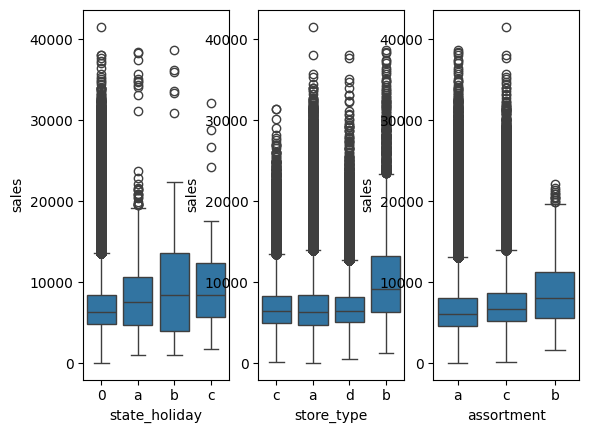

In [164]:
aux1 = df1 [(df1['state_holiday'] !=0) & (df1['sales'] > 0)]

plt.subplot (1,3,1)
sns.boxplot (x='state_holiday', y='sales', data=aux1)

plt.subplot (1,3,2)
sns.boxplot (x='store_type', y='sales', data=aux1)

plt.subplot (1,3,3)
sns.boxplot (x='assortment', y='sales', data=aux1)